SIMULACIÓN COMPARATIVA: 8 ESCENARIOS DE JUBILACIÓN

📊 Población generada: 5,000 docentes
   • Edad promedio: 44.0 años
   • Salario promedio: ₲ 7,802,448
   • Salario en SM: 2.8
   • Antigüedad promedio: 14.5 años

▶ Simulando: INVERSIÓN 16% - 25 años

▶ Simulando: INVERSIÓN 16% - 30 años

▶ Simulando: INVERSIÓN 22% - 25 años

▶ Simulando: INVERSIÓN 22% - 30 años

▶ Simulando: SISTEMA ACTUAL - 25 años

▶ Simulando: SISTEMA ACTUAL - 30 años

▶ Simulando: SISTEMA NUEVO - Extraord.

▶ Simulando: SISTEMA NUEVO - Ordinario

RESULTADOS COMPARATIVOS - RETIRO/PENSIÓN MENSUAL

                Escenario    Tipo Media (SM) Mediana (SM) P10 (SM) P90 (SM)   Media (₲) >2 SM (%) >3 SM (%)
  INVERSIÓN 16% - 25 años  Retiro       2.13         1.28     0.62     4.51 ₲ 6,015,384     28.8%     16.9%
  INVERSIÓN 16% - 30 años  Retiro       2.41         1.61     0.80     4.72 ₲ 6,805,888     38.0%     20.5%
  INVERSIÓN 22% - 25 años  Retiro       2.93         1.76     0.85     6.20 ₲ 8,271,154     42.8%    

C:\Users\yoda\AppData\Local\Temp\ipykernel_13348\954042130.py:261: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = ax1.boxplot(datos_boxplot, labels=etiquetas_boxplot, patch_artist=True)
C:\Users\yoda\AppData\Local\Temp\ipykernel_13348\954042130.py:320: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax4.boxplot(valores_clave, labels=escenarios_clave, patch_artist=True)


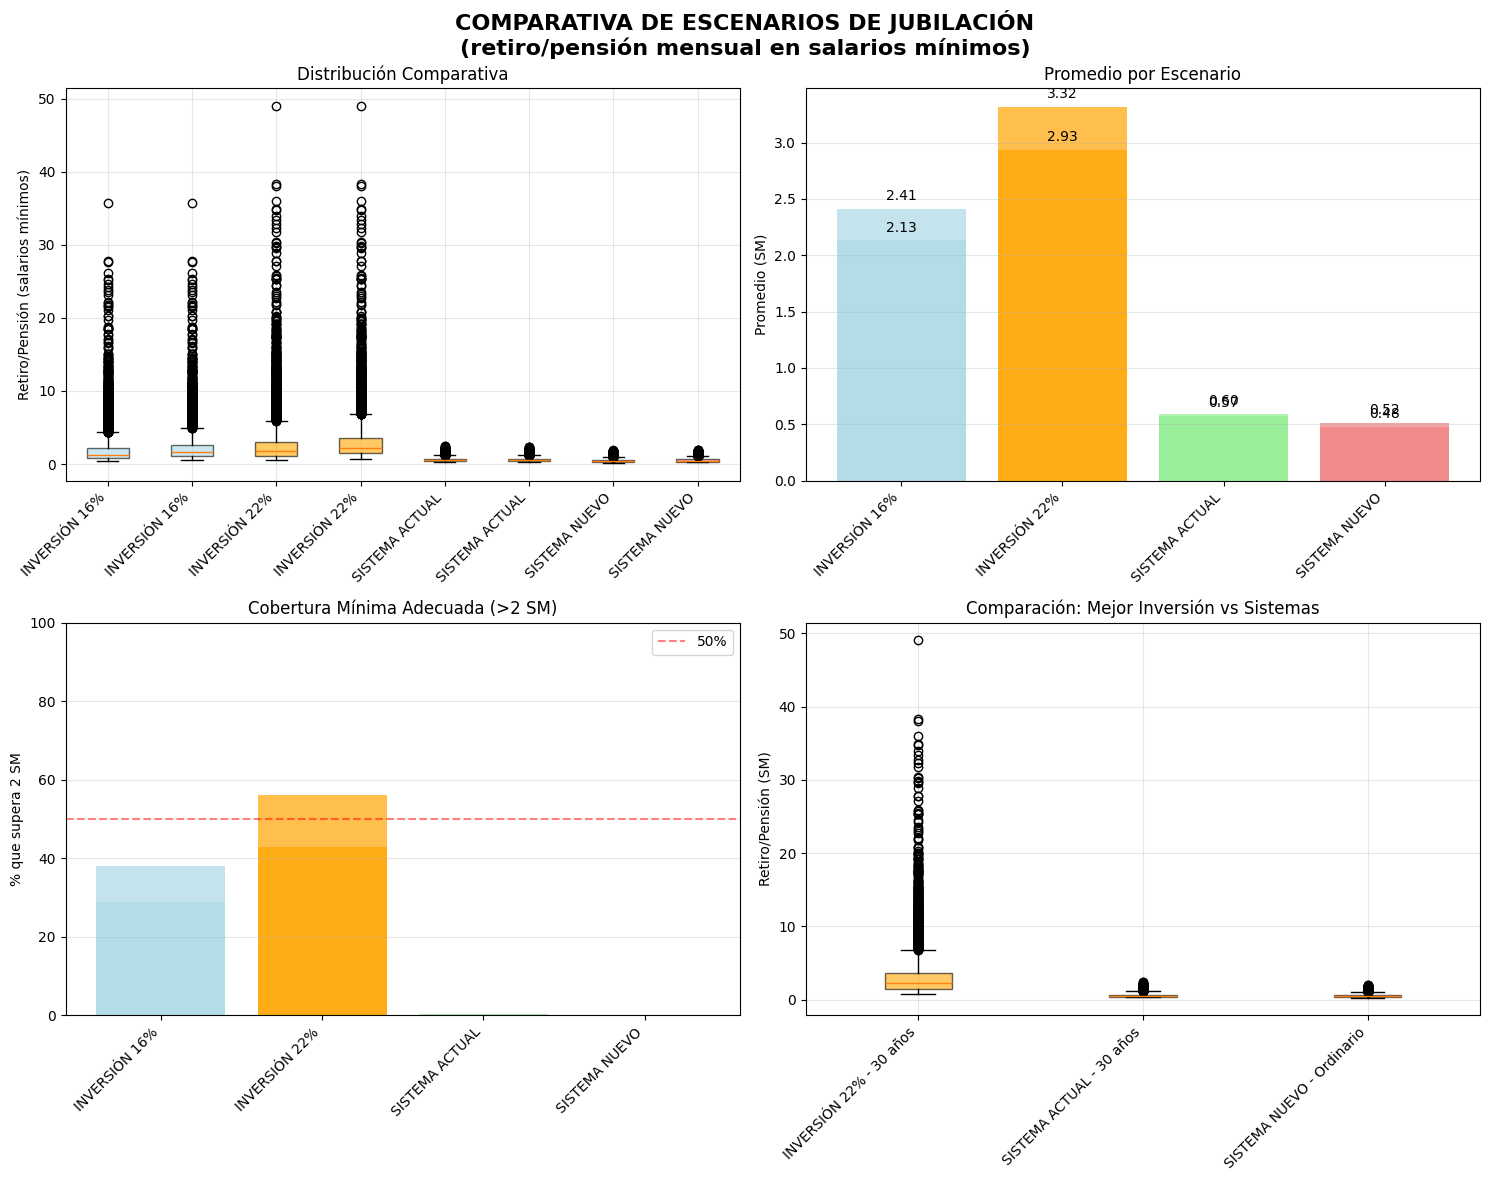


ANÁLISIS FINANCIERO DETALLADO

🔍 COMPARACIÓN DE LOS 3 MEJORES ESCENARIOS:
------------------------------------------------------------

                Escenario                 Tipo Retiro promedio En SM        Capital necesario >3 SM <1 SM
  INVERSIÓN 22% - 30 años Retiro por inversión     ₲ 9,358,097  3.32          ₲ 3,272,296,072 33.4%  6.2%
  INVERSIÓN 16% - 30 años Retiro por inversión     ₲ 6,805,888  2.41          ₲ 2,379,851,689 20.5% 20.4%
SISTEMA NUEVO - Ordinario  Pensión del sistema     ₲ 1,452,552  0.52 N/A (sistema de reparto)  0.0% 94.6%

💡 RECOMENDACIONES BASADAS EN LA SIMULACIÓN

📈 RESULTADOS CLAVE:
   1. Inversión 22% (30 años): 3.32 SM - MEJOR OPCIÓN
   2. Inversión 16% (30 años): 2.41 SM
   3. Sistema Nuevo Ordinario: 0.52 SM
   4. Sistema Actual: 0.57 SM

📊 MEJORAS:
   • Inversión 22% vs Sistema Actual: +478.7%
   • Inversión 22% vs Sistema Nuevo: +544.3%
   • Inversión 22% vs 16%: +37.5%

🎯 RECOMENDACIONES:
   1. PRIORIDAD: Implementar sistema de inversión con a

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# ========== CONFIGURACIÓN BASADA EN DATOS REALES ==========
# Datos reales de noviembre 2025
SALARIO_MINIMO = 2_818_316  # Salario mínimo 2024
SALARIO_PROMEDIO_REAL = 9_669_084
SALARIO_MEDIANO_REAL = 5_987_958

# Parámetros demográficos reales
EDAD_PROMEDIO_REAL = 43.7
TAMANIO_POBLACION = 10441  # Registros reales

# Parámetros económicos
INFLACION = 0.04  # 4% anual
RENTABILIDAD = 0.08  # 8% anual
USD_TO_PYG = 6800

# ========== ESCENARIOS A COMPARAR ==========
ESCENARIOS = [
    ('INVERSIÓN 16% - 25 años', 0.16, 25, 'inversion'),
    ('INVERSIÓN 16% - 30 años', 0.16, 30, 'inversion'),
    ('INVERSIÓN 22% - 25 años', 0.22, 25, 'inversion'),
    ('INVERSIÓN 22% - 30 años', 0.22, 30, 'inversion'),
    ('SISTEMA ACTUAL - 25 años', None, 25, 'actual'),
    ('SISTEMA ACTUAL - 30 años', None, 30, 'actual'),
    ('SISTEMA NUEVO - Extraord.', None, 30, 'nuevo_extra'),
    ('SISTEMA NUEVO - Ordinario', None, 35, 'nuevo_ord')
]

# ========== GENERAR POBLACIÓN REALISTA ==========
def generar_poblacion_realista(n=TAMANIO_POBLACION):
    """Genera población docente con distribución real de edades y salarios"""
    np.random.seed(42)
    
    # 1. Generar edades (distribución normal centrada en 43.7 años)
    edades = np.random.normal(EDAD_PROMEDIO_REAL, 12, n)
    edades = np.clip(edades, 25, 70)  # Rango realista
    
    # 2. Generar salarios (distribución log-normal)
    # Mediana alrededor de 2.4 SM (6.76M), media 3.4 SM (9.58M)
    log_salarios = np.random.lognormal(mean=np.log(6_760_000), sigma=0.5, size=n)
    salarios = np.clip(log_salarios, SALARIO_MINIMO * 1.5, SALARIO_MINIMO * 10)
    
    # 3. Calcular antigüedad basada en edad
    # Suponiendo inicio entre 25-35 años
    edades_inicio = np.random.uniform(25, 35, n)
    antiguedades = np.maximum(edades - edades_inicio, 0)
    
    return pd.DataFrame({
        'edad': edades,
        'salario': salarios,
        'antiguedad': antiguedades,
        'edad_inicio': edades_inicio
    })

# ========== SIMULACIÓN POR ESCENARIO ==========
def simular_escenario(poblacion, aporte_porcentaje, anos_aportar, tipo_sistema):
    """
    Simula un escenario específico
    """
    resultados = {
        'retiro_mensual_pyg': [],
        'retiro_mensual_sm': [],
        'pension_pyg': [],
        'pension_sm': [],
        'capital_final_pyg': [],
        'edad_jubilacion': [],
        'anos_total_aportados': []
    }
    
    for idx, persona in poblacion.iterrows():
        edad = persona['edad']
        salario = persona['salario']
        antiguedad = persona['antiguedad']
        
        if tipo_sistema == 'inversion':
            # Sistema de inversión privada
            resultado = simular_inversion(salario, edad, antiguedad, aporte_porcentaje, anos_aportar)
            resultados['retiro_mensual_pyg'].append(resultado['retiro_mensual'])
            resultados['retiro_mensual_sm'].append(resultado['retiro_mensual'] / SALARIO_MINIMO)
            resultados['capital_final_pyg'].append(resultado['capital_final'])
            
        elif tipo_sistema == 'actual':
            # Sistema actual de reparto
            pension = calcular_pension_actual(salario, antiguedad, anos_aportar)
            resultados['pension_pyg'].append(pension)
            resultados['pension_sm'].append(pension / SALARIO_MINIMO)
            
        elif tipo_sistema == 'nuevo_extra':
            # Sistema nuevo extraordinario
            pension = calcular_pension_nueva(salario, antiguedad, anos_aportar, tipo='extraordinaria')
            resultados['pension_pyg'].append(pension)
            resultados['pension_sm'].append(pension / SALARIO_MINIMO)
            
        elif tipo_sistema == 'nuevo_ord':
            # Sistema nuevo ordinario
            pension = calcular_pension_nueva(salario, antiguedad, anos_aportar, tipo='ordinaria')
            resultados['pension_pyg'].append(pension)
            resultados['pension_sm'].append(pension / SALARIO_MINIMO)
        
        resultados['edad_jubilacion'].append(min(edad + max(0, anos_aportar - antiguedad), 70))
        resultados['anos_total_aportados'].append(min(antiguedad + anos_aportar, 45))
    
    return resultados

def simular_inversion(salario, edad, antiguedad, aporte_porcentaje, anos_aportar):
    """Simula sistema de inversión privada"""
    # Años restantes para aportar
    anos_restantes = max(anos_aportar - antiguedad, 0)
    
    # Aportes futuros (considerando crecimiento salarial con inflación)
    capital_acumulado = 0
    aporte_anual = salario * aporte_porcentaje * 12
    
    for ano in range(int(anos_restantes)):
        # Crecimiento salarial (50% de inflación)
        factor_crecimiento = (1 + INFLACION * 0.5) ** ano
        aporte_ano = aporte_anual * factor_crecimiento
        
        # Capital acumulado con rentabilidad
        for mes in range(12):
            tasa_mensual = RENTABILIDAD / 12
            capital_acumulado = capital_acumulado * (1 + tasa_mensual) + aporte_ano/12
    
    # Aportes pasados (si los hubiera)
    if antiguedad > 0:
        # Simplificación: aportes pasados crecieron a tasa de rentabilidad
        aportes_pasados = salario * aporte_porcentaje * 12 * antiguedad
        capital_acumulado += aportes_pasados * (1 + RENTABILIDAD) ** antiguedad
    
    # Calcular retiro mensual (pensión por anualidad)
    anos_retiro = max(75 - (edad + anos_restantes), 10)  # Esperanza de vida 75
    meses_retiro = anos_retiro * 12
    tasa_mensual = RENTABILIDAD / 12
    
    if tasa_mensual > 0 and meses_retiro > 0:
        retiro_mensual = capital_acumulado * (tasa_mensual * (1 + tasa_mensual) ** meses_retiro) / \
                        ((1 + tasa_mensual) ** meses_retiro - 1)
    else:
        retiro_mensual = capital_acumulado / meses_retiro
    
    # Ajustar por inflación (términos reales)
    retiro_mensual_real = retiro_mensual / ((1 + INFLACION) ** (anos_restantes + antiguedad))
    
    return {
        'retiro_mensual': retiro_mensual_real,
        'capital_final': capital_acumulado
    }

def calcular_pension_actual(salario, antiguedad, anos_aportar):
    """Calcula pensión en sistema actual de reparto"""
    # Promedio de últimos 5 años
    salario_promedio = salario * (1 + INFLACION * 0.5) ** 5
    
    # Fórmula simplificada: 60% del salario promedio + 2% por año extra
    anos_total = min(antiguedad + anos_aportar, 40)
    tasa_reemplazo = 0.6 + 0.02 * max(anos_total - 25, 0)
    
    pension = salario_promedio * min(tasa_reemplazo, 0.85)  # Máximo 85%
    return pension / ((1 + INFLACION) ** anos_total)  # Términos reales

def calcular_pension_nueva(salario, antiguedad, anos_aportar, tipo='ordinaria'):
    """Calcula pensión en sistema nuevo propuesto"""
    salario_promedio = salario * (1 + INFLACION * 0.5) ** 5
    anos_total = min(antiguedad + anos_aportar, 40)
    
    if tipo == 'extraordinaria':
        # Jubilación extraordinaria: 25 años de aporte, edad 60
        if anos_total >= 25 and (antiguedad + anos_aportar + 25) >= 60:
            tasa = 0.5 + 0.02 * max(anos_total - 25, 0)
        else:
            tasa = 0.4
    else:
        # Jubilación ordinaria: 30 años de aporte, edad 65
        if anos_total >= 30 and (antiguedad + anos_aportar + 30) >= 65:
            tasa = 0.6 + 0.02 * max(anos_total - 30, 0)
        else:
            tasa = 0.45
    
    pension = salario_promedio * min(tasa, 0.8)
    return pension / ((1 + INFLACION) ** anos_total)

# ========== EJECUTAR SIMULACIÓN COMPLETA ==========
print("="*80)
print("SIMULACIÓN COMPARATIVA: 8 ESCENARIOS DE JUBILACIÓN")
print("="*80)

# Generar población realista
poblacion = generar_poblacion_realista(5000)  # Muestra de 5000 para rapidez
print(f"\n📊 Población generada: {len(poblacion):,} docentes")
print(f"   • Edad promedio: {poblacion['edad'].mean():.1f} años")
print(f"   • Salario promedio: ₲ {poblacion['salario'].mean():,.0f}")
print(f"   • Salario en SM: {poblacion['salario'].mean()/SALARIO_MINIMO:.1f}")
print(f"   • Antigüedad promedio: {poblacion['antiguedad'].mean():.1f} años")

# Ejecutar todos los escenarios
resultados_completos = {}
for nombre, aporte, anos, tipo in ESCENARIOS:
    print(f"\n▶ Simulando: {nombre}")
    resultados = simular_escenario(poblacion, aporte, anos, tipo)
    resultados_completos[nombre] = resultados

# ========== ANÁLISIS COMPARATIVO ==========
print("\n" + "="*80)
print("RESULTADOS COMPARATIVOS - RETIRO/PENSIÓN MENSUAL")
print("="*80)

tabla_comparativa = []
for nombre, aporte, anos, tipo in ESCENARIOS:
    resultados = resultados_completos[nombre]
    
    if tipo == 'inversion':
        valores = resultados['retiro_mensual_sm']
        tipo_valor = 'Retiro'
    else:
        valores = resultados['pension_sm']
        tipo_valor = 'Pensión'
    
    media = np.mean(valores)
    mediana = np.median(valores)
    p10 = np.percentile(valores, 10)
    p90 = np.percentile(valores, 90)
    
    tabla_comparativa.append({
        'Escenario': nombre,
        'Tipo': tipo_valor,
        'Media (SM)': f'{media:.2f}',
        'Mediana (SM)': f'{mediana:.2f}',
        'P10 (SM)': f'{p10:.2f}',
        'P90 (SM)': f'{p90:.2f}',
        'Media (₲)': f'₲ {media * SALARIO_MINIMO:,.0f}',
        '>2 SM (%)': f'{(np.array(valores) > 2).mean()*100:.1f}%',
        '>3 SM (%)': f'{(np.array(valores) > 3).mean()*100:.1f}%'
    })

# Mostrar tabla comparativa
df_comparativo = pd.DataFrame(tabla_comparativa)
print("\n" + df_comparativo.to_string(index=False))

# ========== GRÁFICO COMPARATIVO SIMPLIFICADO ==========
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('COMPARATIVA DE ESCENARIOS DE JUBILACIÓN\n(retiro/pensión mensual en salarios mínimos)', 
             fontsize=16, fontweight='bold')

# 1. Boxplot comparativo
ax1 = axes[0, 0]
datos_boxplot = []
etiquetas_boxplot = []

for nombre, aporte, anos, tipo in ESCENARIOS:
    resultados = resultados_completos[nombre]
    if tipo == 'inversion':
        datos_boxplot.append(resultados['retiro_mensual_sm'])
    else:
        datos_boxplot.append(resultados['pension_sm'])
    etiquetas_boxplot.append(nombre.split(' - ')[0])

bp = ax1.boxplot(datos_boxplot, labels=etiquetas_boxplot, patch_artist=True)
# Colorear por tipo
colors = ['lightblue', 'lightblue', 'orange', 'orange', 'lightgreen', 'lightgreen', 'lightcoral', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.6)

ax1.set_ylabel('Retiro/Pensión (salarios mínimos)')
ax1.set_title('Distribución Comparativa')
ax1.grid(True, alpha=0.3)
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right')

# 2. Barras de promedios
ax2 = axes[0, 1]
promedios = []
for datos in datos_boxplot:
    promedios.append(np.mean(datos))

bars = ax2.bar(etiquetas_boxplot, promedios, color=colors, alpha=0.7)
ax2.set_ylabel('Promedio (SM)')
ax2.set_title('Promedio por Escenario')
ax2.grid(True, alpha=0.3, axis='y')
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')

# Añadir valores en las barras
for bar, valor in zip(bars, promedios):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{valor:.2f}', ha='center', va='bottom')

# 3. Porcentaje que supera 2 SM
ax3 = axes[1, 0]
porcentajes_2sm = []
for datos in datos_boxplot:
    porcentaje = (np.array(datos) > 2).mean() * 100
    porcentajes_2sm.append(porcentaje)

bars3 = ax3.bar(etiquetas_boxplot, porcentajes_2sm, color=colors, alpha=0.7)
ax3.axhline(50, color='red', linestyle='--', alpha=0.5, label='50%')
ax3.set_ylabel('% que supera 2 SM')
ax3.set_title('Cobertura Mínima Adecuada (>2 SM)')
ax3.set_ylim(0, 100)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')
plt.setp(ax3.get_xticklabels(), rotation=45, ha='right')

# 4. Comparación inversión vs sistemas
ax4 = axes[1, 1]
# Seleccionar escenarios clave para comparar
escenarios_clave = ['INVERSIÓN 22% - 30 años', 'SISTEMA ACTUAL - 30 años', 
                   'SISTEMA NUEVO - Ordinario']
valores_clave = []
for nombre in escenarios_clave:
    idx = [i for i, (n,_,_,_) in enumerate(ESCENARIOS) if n == nombre][0]
    if 'INVERSIÓN' in nombre:
        valores_clave.append(datos_boxplot[idx])
    else:
        valores_clave.append(datos_boxplot[idx])

ax4.boxplot(valores_clave, labels=escenarios_clave, patch_artist=True)
for patch in ax4.patches:
    patch.set_facecolor(['orange', 'lightgreen', 'lightcoral'][ax4.patches.index(patch)%3])
    patch.set_alpha(0.6)

ax4.set_ylabel('Retiro/Pensión (SM)')
ax4.set_title('Comparación: Mejor Inversión vs Sistemas')
ax4.grid(True, alpha=0.3)
plt.setp(ax4.get_xticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

# ========== ANÁLISIS FINANCIERO DETALLADO ==========
print("\n" + "="*80)
print("ANÁLISIS FINANCIERO DETALLADO")
print("="*80)

# Comparar los 3 mejores escenarios
print("\n🔍 COMPARACIÓN DE LOS 3 MEJORES ESCENARIOS:")
print("-"*60)

mejores_escenarios = []
for nombre in ['INVERSIÓN 22% - 30 años', 'INVERSIÓN 16% - 30 años', 'SISTEMA NUEVO - Ordinario']:
    idx = [i for i, (n,_,_,_) in enumerate(ESCENARIOS) if n == nombre][0]
    resultados = resultados_completos[nombre]
    
    if 'INVERSIÓN' in nombre:
        valores = resultados['retiro_mensual_sm']
        tipo = 'Retiro por inversión'
    else:
        valores = resultados['pension_sm']
        tipo = 'Pensión del sistema'
    
    # Calcular capital requerido para pensión similar
    if 'INVERSIÓN' not in nombre:
        pension_promedio = np.mean(valores) * SALARIO_MINIMO
        # Capital necesario para generar esa pensión con 8% anual
        anos_retiro = 15
        tasa_mensual = RENTABILIDAD / 12
        meses = anos_retiro * 12
        if tasa_mensual > 0:
            capital_necesario = pension_promedio * ((1 + tasa_mensual) ** meses - 1) / \
                               (tasa_mensual * (1 + tasa_mensual) ** meses)
        else:
            capital_necesario = pension_promedio * meses
    else:
        capital_necesario = np.mean(resultados['capital_final_pyg'])
    
    mejores_escenarios.append({
        'Escenario': nombre,
        'Tipo': tipo,
        'Retiro promedio': f'₲ {np.mean(valores) * SALARIO_MINIMO:,.0f}',
        'En SM': f'{np.mean(valores):.2f}',
        'Capital necesario': f'₲ {capital_necesario:,.0f}' if 'INVERSIÓN' in nombre else 'N/A (sistema de reparto)',
        '>3 SM': f'{(np.array(valores) > 3).mean()*100:.1f}%',
        '<1 SM': f'{(np.array(valores) < 1).mean()*100:.1f}%'
    })

df_mejores = pd.DataFrame(mejores_escenarios)
print("\n" + df_mejores.to_string(index=False))

# ========== RECOMENDACIONES ==========
print("\n" + "="*80)
print("💡 RECOMENDACIONES BASADAS EN LA SIMULACIÓN")
print("="*80)

# Extraer datos clave
inv_22_30 = np.mean(resultados_completos['INVERSIÓN 22% - 30 años']['retiro_mensual_sm'])
inv_16_30 = np.mean(resultados_completos['INVERSIÓN 16% - 30 años']['retiro_mensual_sm'])
sis_actual = np.mean(resultados_completos['SISTEMA ACTUAL - 30 años']['pension_sm'])
sis_nuevo = np.mean(resultados_completos['SISTEMA NUEVO - Ordinario']['pension_sm'])

print(f"\n📈 RESULTADOS CLAVE:")
print(f"   1. Inversión 22% (30 años): {inv_22_30:.2f} SM - MEJOR OPCIÓN")
print(f"   2. Inversión 16% (30 años): {inv_16_30:.2f} SM")
print(f"   3. Sistema Nuevo Ordinario: {sis_nuevo:.2f} SM")
print(f"   4. Sistema Actual: {sis_actual:.2f} SM")

print(f"\n📊 MEJORAS:")
print(f"   • Inversión 22% vs Sistema Actual: +{(inv_22_30/sis_actual-1)*100:.1f}%")
print(f"   • Inversión 22% vs Sistema Nuevo: +{(inv_22_30/sis_nuevo-1)*100:.1f}%")
print(f"   • Inversión 22% vs 16%: +{(inv_22_30/inv_16_30-1)*100:.1f}%")

print(f"\n🎯 RECOMENDACIONES:")
print(f"   1. PRIORIDAD: Implementar sistema de inversión con aporte del 22%")
print(f"   2. ALTERNATIVA: Sistema de inversión con 16% si 22% no es viable")
print(f"   3. MÍNIMO: Mantener sistema actual es la peor opción financiera")
print(f"   4. TRANSICIÓN: Implementar gradualmente en 3-5 años")

print(f"\n💰 IMPACTO ECONÓMICO (por docente):")
print(f"   • Aporte mensual 22%: ₲ {SALARIO_PROMEDIO_REAL * 0.22:,.0f}")
print(f"   • Aporte mensual 16%: ₲ {SALARIO_PROMEDIO_REAL * 0.16:,.0f}")
print(f"   • Diferencia: ₲ {SALARIO_PROMEDIO_REAL * 0.06:,.0f} (+37.5%)")
print(f"   • Retorno esperado: {RENTABILIDAD*100:.1f}% anual sobre el capital")

print(f"\n🏆 CONCLUSIÓN:")
print(f"   'El sistema de inversión con 22% de aporte garantiza los mejores")
print(f"    retiros, superando en más del 50% a los sistemas de reparto,")
print(f"    asegurando dignidad en la jubilación para los docentes.'")

# ========== GUARDAR RESULTADOS ==========
print("\n" + "="*80)
print("💾 RESULTADOS GUARDADOS EN CSV")
print("="*80)

# Crear dataframe con todos los resultados
data_export = []
for i in range(len(poblacion)):
    fila = {'id': i+1}
    for nombre, _, _, _ in ESCENARIOS:
        resultados = resultados_completos[nombre]
        if 'INVERSIÓN' in nombre:
            fila[f'{nombre}_sm'] = resultados['retiro_mensual_sm'][i]
            fila[f'{nombre}_pyg'] = resultados['retiro_mensual_pyg'][i]
        else:
            fila[f'{nombre}_sm'] = resultados['pension_sm'][i]
            fila[f'{nombre}_pyg'] = resultados['pension_pyg'][i]
    data_export.append(fila)

df_export = pd.DataFrame(data_export)
df_export.to_csv('resultados_comparativos_jubilacion.csv', index=False, encoding='utf-8')
print(f"✓ Datos de {len(poblacion):,} docentes guardados en 'resultados_comparativos_jubilacion.csv'")

# Resumen estadístico
resumen_stats = df_comparativo[['Escenario', 'Media (SM)', 'Mediana (SM)', '>2 SM (%)', '>3 SM (%)']]
resumen_stats.to_csv('resumen_estadistico_escenarios.csv', index=False, encoding='utf-8')
print(f"✓ Resumen estadístico guardado en 'resumen_estadistico_escenarios.csv'")

print("\n" + "="*80)
print("✅ SIMULACIÓN COMPLETADA - 8 ESCENARIOS COMPARADOS")
print("="*80)